# Diabetes Missing Data (EDA)

##Step of EDA

1. Import Libraries

2. Load Data (df = pd.read_csv("file.csv"))

3. Data Understanding(/Knowing):
  
  3.1. df.shape
  
  3.2. df.head(10),df.tail(10),df.sample(5)

  3.3. df.info() --> dtype , null

  3.4. df.describe() --> Statistical overview

  3.5. df.select_dtype(include/exclude = "number" / "Object")

  3.6. Feature relation: Corrolation Mutual Information , Statistical Test

4. Remove duplicate

5. Null Handling

6. Outlier Handling

7. Skewness Handling

8. Filter data for Advance analysis

9. Scale the numeric

10. Encode Categorical

11. Feature engineering:
  
  11.1 Dimensionality Reduction(e.g. PCA,tSNE,UMAP) --> Unsupervised Learning
  
  11.2. Manual Featuring

###Import Liberies

In [ ]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Get dataset

In [ ]:
!wget https://github.com/YBI-Foundation/Dataset/raw/main/Diabetes%20Missing%20Data.csv

--2024-08-09 13:26:44--  https://github.com/YBI-Foundation/Dataset/raw/main/Diabetes%20Missing%20Data.csv
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Diabetes%20Missing%20Data.csv [following]
--2024-08-09 13:26:44--  https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Diabetes%20Missing%20Data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23212 (23K) [text/plain]
Saving to: ‘Diabetes Missing Data.csv’

Diabetes Missing Da 100%[===================>]  22.67K  --.-KB/s    in 0.001s  

2024-08-09 13:26:45 (17.2 MB/s) - ‘Diabetes Missing Data.csv’ saved

###Read Dataset

In [ ]:
df = pd.read_csv("Diabetes Missing Data.csv")

In [ ]:
df.shape

(768, 9)

In [ ]:
# Check the first five rows of dataFrame
df.head()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
df.sample(10,random_state=10)

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
568,4,154.0,72.0,29.0,126.0,31.3,0.338,37,0
620,2,112.0,86.0,42.0,160.0,38.4,0.246,28,0
456,1,135.0,54.0,NaN,NaN,26.7,0.687,62,0
197,3,107.0,62.0,13.0,48.0,22.9,0.678,23,1
714,3,102.0,74.0,NaN,NaN,29.5,0.121,32,0
27,1,97.0,66.0,15.0,140.0,23.2,0.487,22,0
277,0,104.0,64.0,23.0,116.0,27.8,0.454,23,0
64,7,114.0,66.0,NaN,NaN,32.8,0.258,42,1
720,4,83.0,86.0,19.0,NaN,29.3,0.317,34,0
475,0,137.0,84.0,27.0,NaN,27.3,0.231,59,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnant           768 non-null    int64  
 1   Glucose            763 non-null    float64
 2   Diastolic_BP       733 non-null    float64
 3   Skin_Fold          541 non-null    float64
 4   Serum_Insulin      394 non-null    float64
 5   BMI                757 non-null    float64
 6   Diabetes_Pedigree  768 non-null    float64
 7   Age                768 non-null    int64  
 8   Class              768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [ ]:
df.columns

Index(['Pregnant', 'Glucose', 'Diastolic_BP', 'Skin_Fold', 'Serum_Insulin',
       'BMI', 'Diabetes_Pedigree', 'Age', 'Class'],
      dtype='object')

In [ ]:
# seperate numeric columns
numeric_col = df.select_dtypes(include = "number").columns
numeric_df = df.select_dtypes(include = "number")
numeric_df

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [ ]:
#cat_df = df.select_dtypes(include="object").columns
cat_col = df.select_dtypes(exclude="number").columns
cat_df = df.select_dtypes(exclude="number")
cat_df

""
0
1
2
3
4
...
763
764
765
766


In [ ]:
#Transpose
numeric_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnant,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,763.0,121.686763,30.535641,44.000,99.00000,117.0000,141.00000,199.00
Diastolic_BP,733.0,72.405184,12.382158,24.000,64.00000,72.0000,80.00000,122.00
Skin_Fold,541.0,29.153420,10.476982,7.000,22.00000,29.0000,36.00000,99.00
Serum_Insulin,394.0,155.548223,118.775855,14.000,76.25000,125.0000,190.00000,846.00
BMI,757.0,32.457464,6.924988,18.200,27.50000,32.3000,36.60000,67.10
Diabetes_Pedigree,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
df[numeric_col].corr()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
Pregnant,1.000000,0.128135,0.214178,0.100239,0.082171,0.021719,-0.033523,0.544341,0.221898
Glucose,0.128135,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.494650
Diastolic_BP,0.214178,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.170589
Skin_Fold,0.100239,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.259491
Serum_Insulin,0.082171,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
BMI,0.021719,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.313680
Diabetes_Pedigree,-0.033523,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,0.173844
Age,0.544341,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.238356
Class,0.221898,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,1.000000


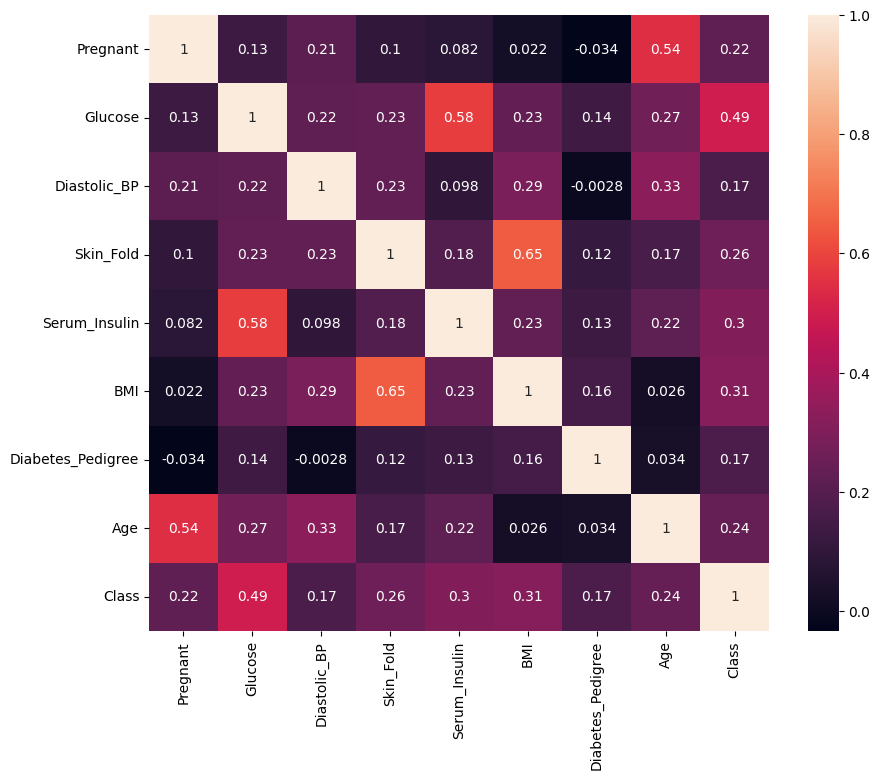

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_col].corr() , annot = True)
plt.show()

In [ ]:
# remove duplicate
df.duplicated().sum() #Summation

0

In [ ]:
df = df.drop_duplicates()

In [ ]:
# Check nulls
# Null --> Nothing / Missing / refer to nowhere
# NaN --> Not a Number(float('nan') , np.nan())
df.isnull().sum()


,0
Pregnant,0
Glucose,5
Diastolic_BP,35
Skin_Fold,227
Serum_Insulin,374
BMI,11
Diabetes_Pedigree,0
Age,0
Class,0


In [ ]:
df.isna().sum()

,0
Pregnant,0
Glucose,5
Diastolic_BP,35
Skin_Fold,227
Serum_Insulin,374
BMI,11
Diabetes_Pedigree,0
Age,0
Class,0


In [ ]:
# Whole Null Sumation
df.isna().sum().sum()

652

In [ ]:
df_cleaned = df.dropna()#Rows
df_Cleaned = df.dropna(axis=1)#Column

In [ ]:
# Impute nulls, constant values | Numeric --> mean or median | Categorical --> mode

df2 = df.fillna(0)
df3 = df.fillna("Nothing")


df4 = df[numeric_col].fillna(df[numeric_col].mean()) #mean or median


#KNN for Numeric
from sklearn.impute import KNNImputer
KNNimp = KNNImputer(n_neighbors = 3)
df5 = KNNimp.fit_transform(df[numeric_col])
df6 = pd.DataFrame(df5)#.isnull().sum()




In [ ]:
df6.columns = df.columns
df6

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6.0,148.0,72.0,35.000000,125.333333,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.000000,66.666667,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,30.000000,195.000000,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.000000,180.000000,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.000000,166.666667,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.000000,112.000000,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,35.333333,120.666667,30.1,0.349,47.0,1.0


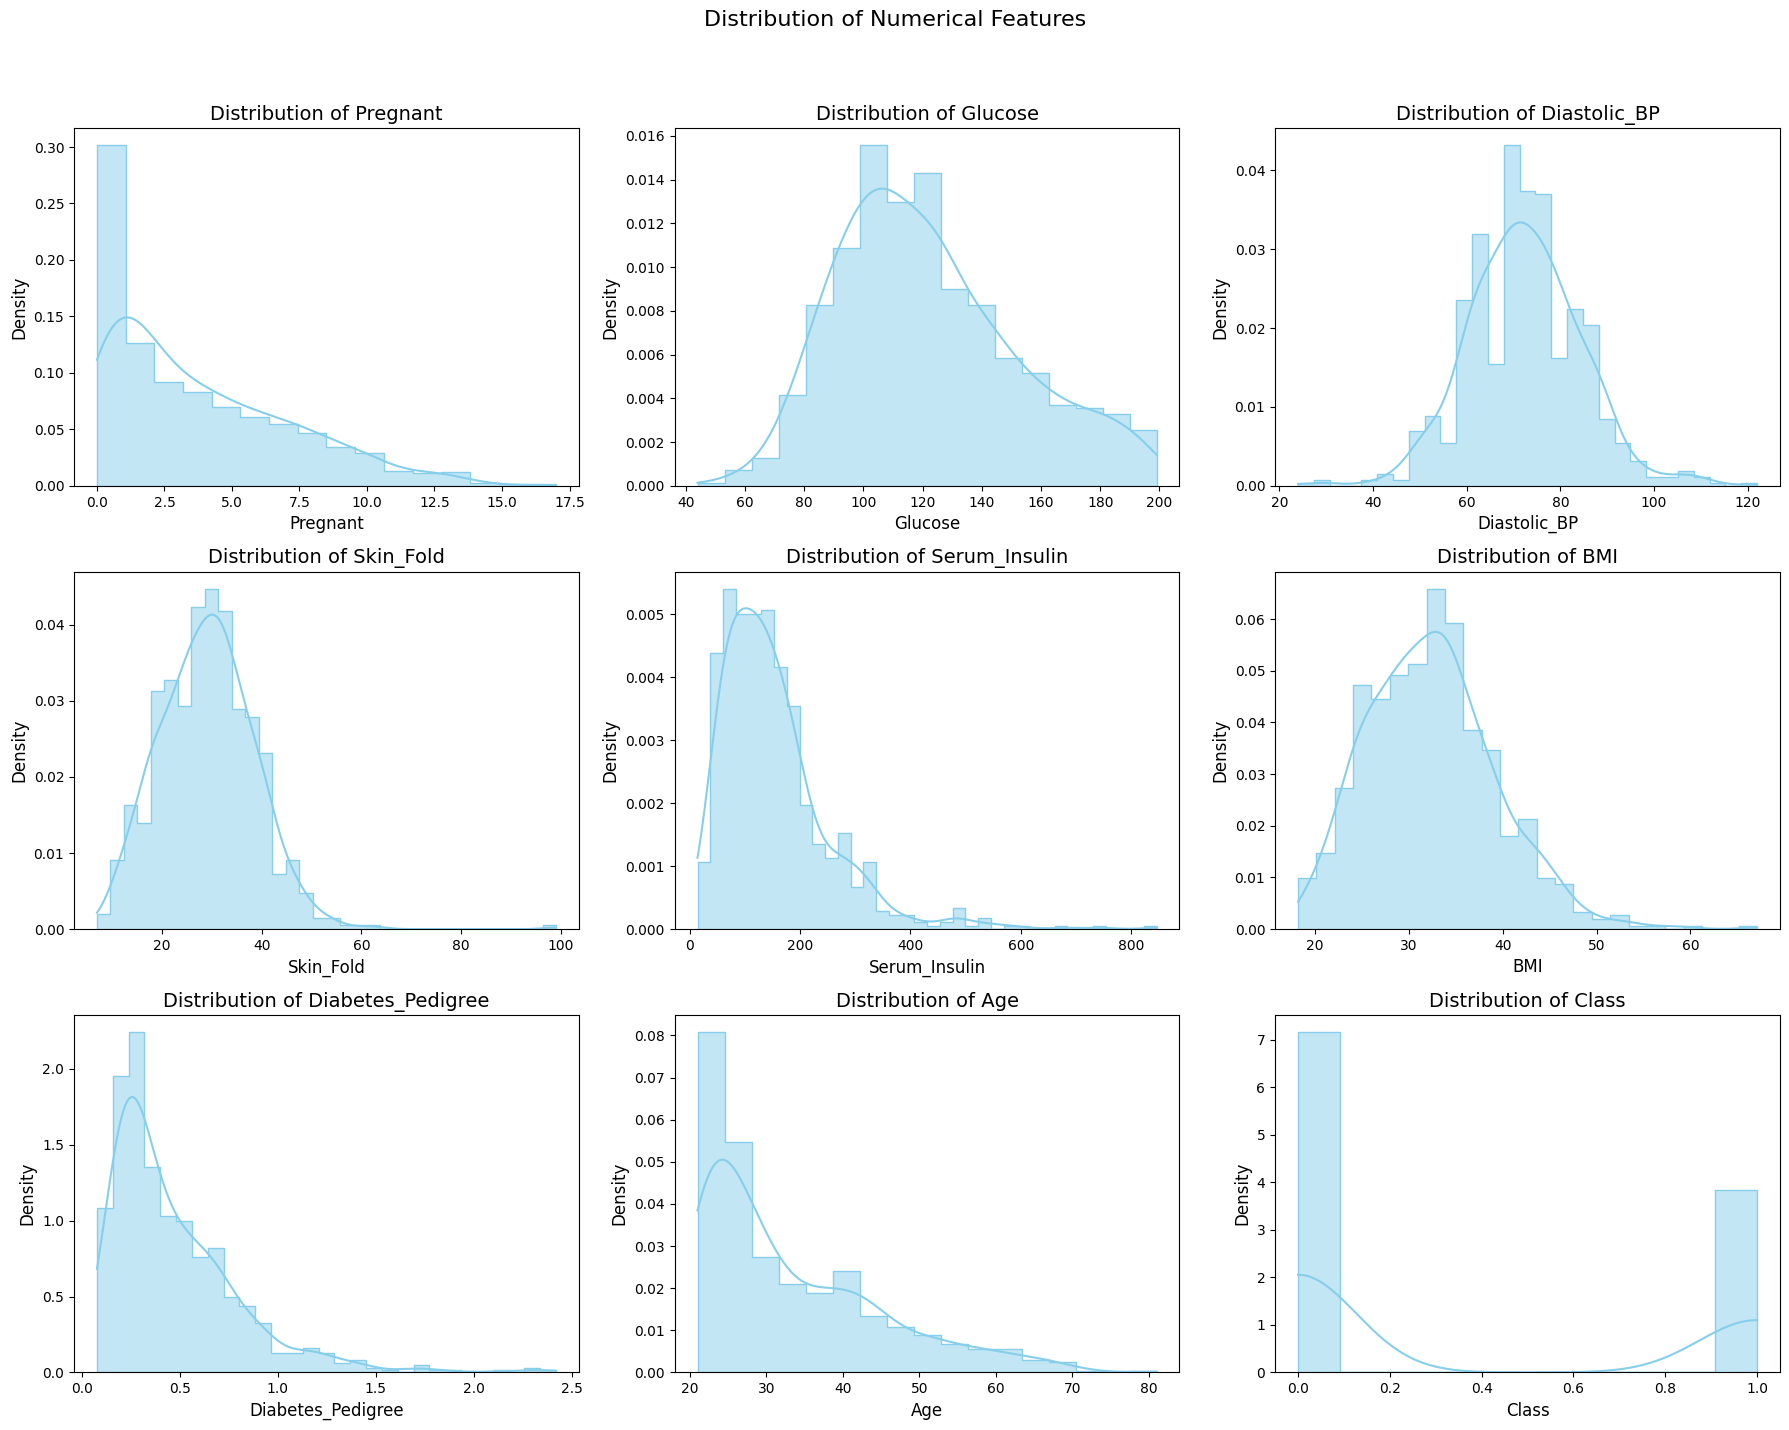

In [ ]:
# Skewness analysis
def visualize_numerical_distributions(df, exclude_columns='id'):

    # Identify numerical columns (excluding specified columns)
    numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
    numeric_cols = [col for col in numeric_cols if col != exclude_columns]

    # Set up the figure for multiple subplots
    num_cols = 3  # Number of columns for the subplot grid
    num_rows = (len(numeric_cols) + num_cols - 1) // num_cols  # Calculate number of rows needed

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows))
    fig.suptitle('Distribution of Numerical Features', fontsize=16)

    # Flatten axes array for easy iteration
    axes = axes.flatten()

    # Iterate over each numerical column and create a histogram with KDE
    for i, col in enumerate(numeric_cols):
        sns.histplot(df[col], kde=True, ax=axes[i], color="skyblue", element="step", stat="density")
        axes[i].set_title(f'Distribution of {col}', fontsize=14)
        axes[i].set_xlabel(col, fontsize=12)
        axes[i].set_ylabel('Density', fontsize=12)

    # Remove unused axes
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the main title space
    plt.show()


visualize_numerical_distributions(df6)

In [ ]:
from scipy import stats

def robust_skewness_handler(df, threshold=0.5):
    transformed_df = df.copy()
    transformation_dict = {}

    for col in df.select_dtypes(include=[np.number]).columns:
        data = df[col].dropna()
        skewness = data.skew()

        if abs(skewness) > threshold:
            print(f"Handling skewness for {col} (skewness: {skewness:.2f})")

            # Handle zero-inflated or near-zero-inflated data
            if (data == 0).sum() / len(data) > 0.1:  # If more than 10% zeros
                non_zero = data[data != 0]
                if len(non_zero) > 0:
                    log_transform = np.log1p(non_zero)
                    transformed_df.loc[data != 0, col] = log_transform
                    transformation_dict[col] = ('log1p', 'zero-inflated')
                    print(f"  Applied Log1p to non-zero values for {col}")
                continue

            # Try Box-Cox transformation
            min_val = data.min()
            if min_val <= 0:
                shift = abs(min_val) + 1
                shifted_data = data + shift
            else:
                shifted_data = data

            try:
                transformed_data, lambda_param = stats.boxcox(shifted_data)
                transformed_df[col] = transformed_data
                transformation_dict[col] = ('box-cox', lambda_param)
                print(f"  Applied Box-Cox to {col} (lambda: {lambda_param:.2f})")
            except:
                # If Box-Cox fails, try other transformations
                if skewness > 0:  # Right-skewed
                    if data.max() / data.min() > 1000:  # Very large range
                        transformed_df[col] = np.log1p(data)
                        transformation_dict[col] = ('log1p', None)
                        print(f"  Applied Log1p to {col}")
                    else:
                        transformed_df[col] = np.sqrt(data)
                        transformation_dict[col] = ('sqrt', None)
                        print(f"  Applied Square Root to {col}")
                else:  # Left-skewed
                    transformed_df[col] = data ** 2
                    transformation_dict[col] = ('square', None)
                    print(f"  Applied Square to {col}")

    return transformed_df, transformation_dict

# Example usage:
transformed_df, transformations = robust_skewness_handler(df6)

Handling skewness for Pregnant (skewness: 0.90)
  Applied Log1p to non-zero values for Pregnant
Handling skewness for Glucose (skewness: 0.53)
  Applied Box-Cox to Glucose (lambda: 0.09)
Handling skewness for Skin_Fold (skewness: 0.65)
  Applied Box-Cox to Skin_Fold (lambda: 0.60)
Handling skewness for Serum_Insulin (skewness: 2.03)
  Applied Box-Cox to Serum_Insulin (lambda: 0.10)
Handling skewness for BMI (skewness: 0.61)
  Applied Box-Cox to BMI (lambda: 0.07)
Handling skewness for Diabetes_Pedigree (skewness: 1.92)
  Applied Box-Cox to Diabetes_Pedigree (lambda: -0.07)
Handling skewness for Age (skewness: 1.13)
  Applied Box-Cox to Age (lambda: -1.09)
Handling skewness for Class (skewness: 0.64)
  Applied Log1p to non-zero values for Class


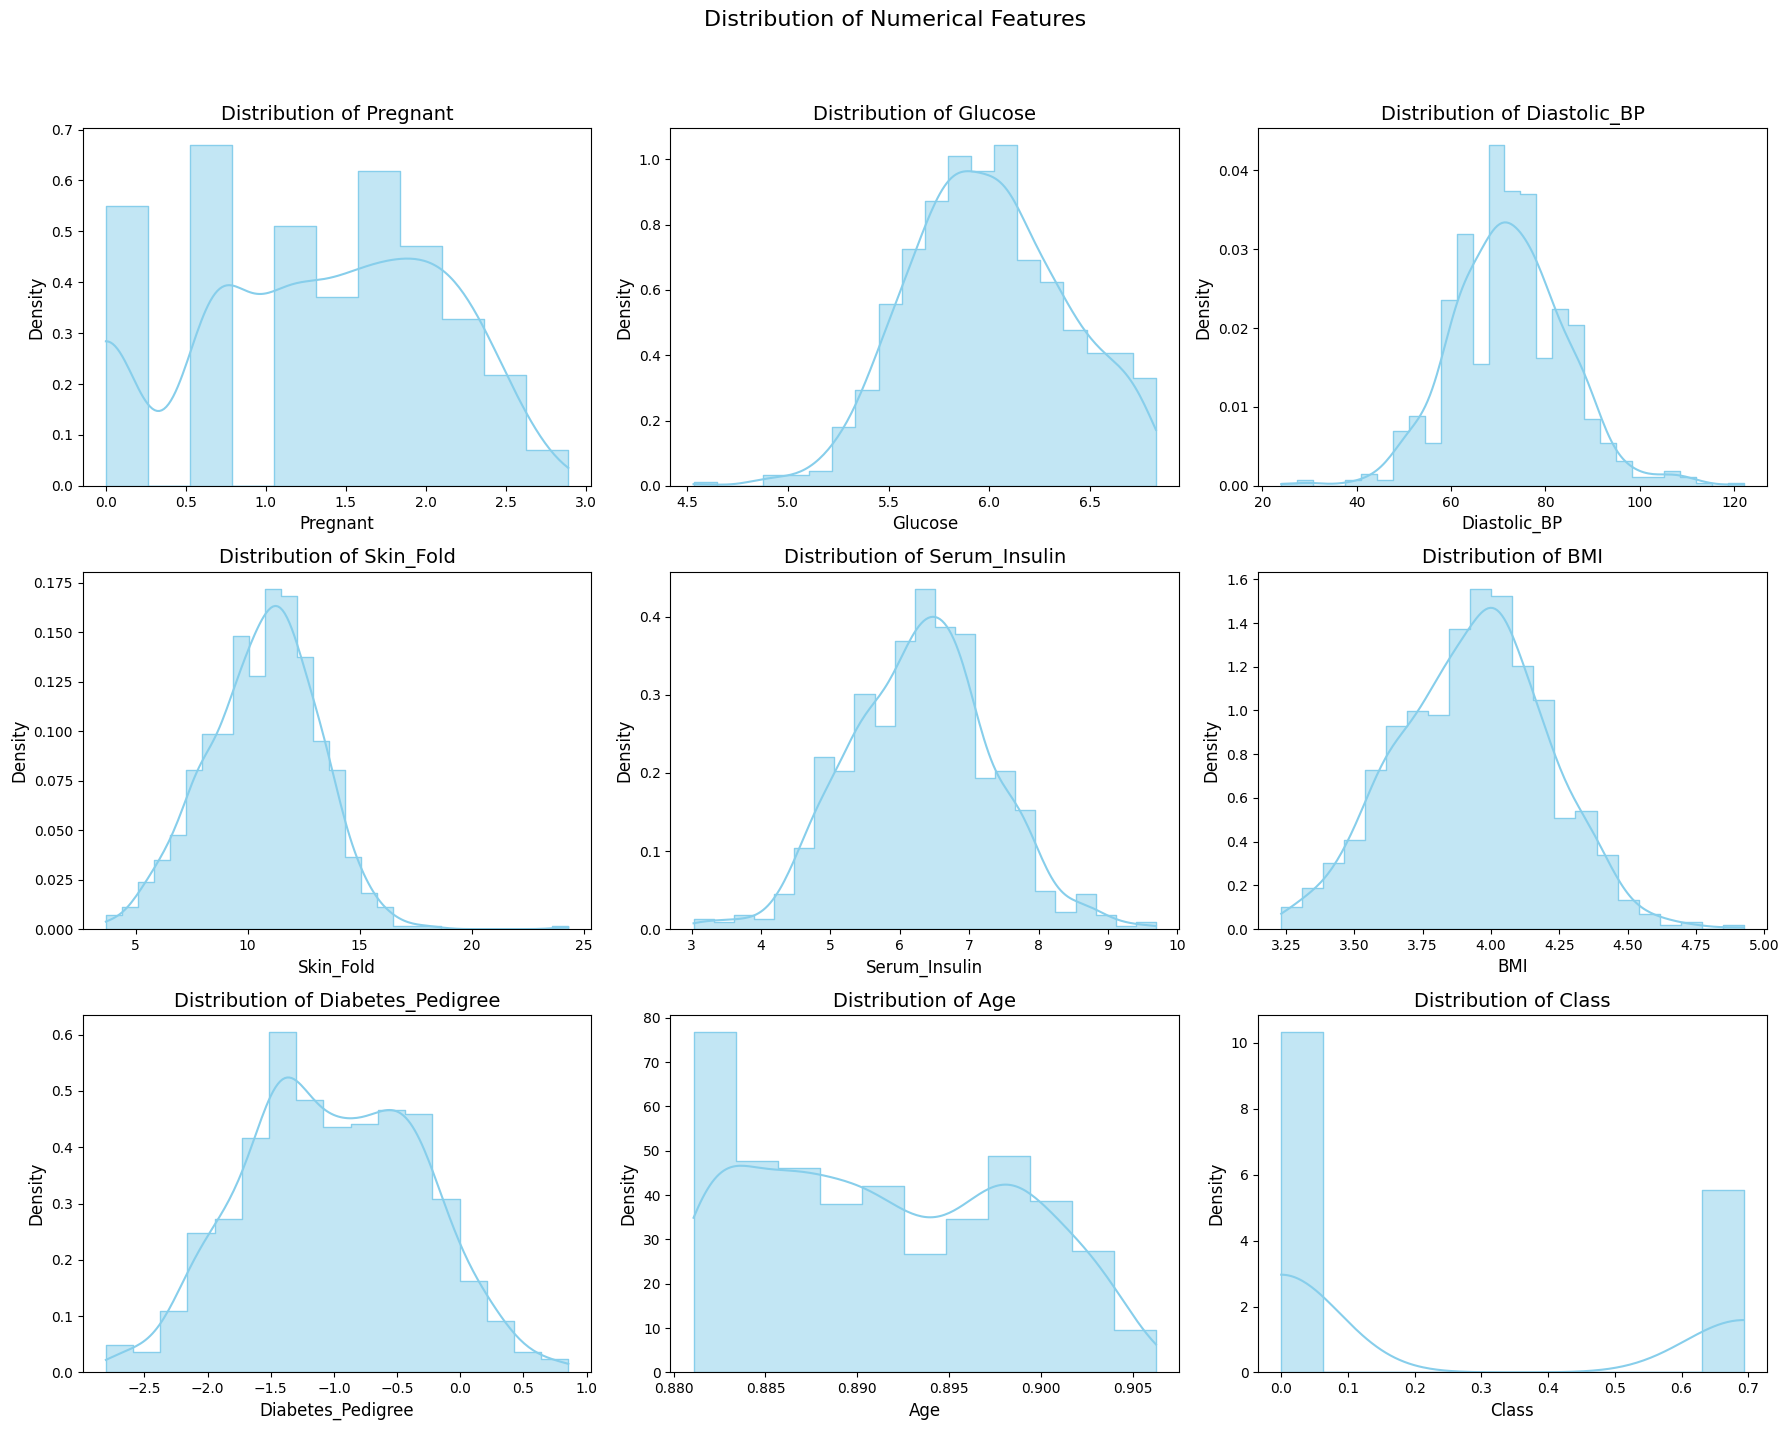

In [ ]:
visualize_numerical_distributions(transformed_df)

###Castdown

In [ ]:
#Change datatype
df6['Class'] = df6['Class'].astype('category')
for i in df6.select_dtypes(include = ["float64"]).columns :
  df6[i] = df6[i].astype("float32")
df6["Age"] = df6["Age"].astype("int8")
df6["Pregnant"] = df6["Pregnant"].astype("int8")
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Pregnant           768 non-null    int8    
 1   Glucose            768 non-null    float32 
 2   Diastolic_BP       768 non-null    float32 
 3   Skin_Fold          768 non-null    float32 
 4   Serum_Insulin      768 non-null    float32 
 5   BMI                768 non-null    float32 
 6   Diabetes_Pedigree  768 non-null    float32 
 7   Age                768 non-null    int8    
 8   Class              768 non-null    category
dtypes: category(1), float32(6), int8(2)
memory usage: 20.5 KB


###Save to csv

In [ ]:
#Save to CSV
df6.to_csv("Small Diabetes Missing Data.csv")